In [2]:
import pandas as pd
import numpy as np

subpath = "naive_periodic_experiment_k_fold/2025-02-20T23:11:42"
data = pd.read_csv(f'{subpath}/total_X.csv')
reference_split = pd.read_csv(f'naive_periodic_experiment/2025-01-06T19:07:27/total_X.csv', index_col=False)
reference_tptt = pd.read_csv(f'naive_periodic_experiment_tptt/2025-01-26T20:09:01/total_X.csv', index_col=False)


In [3]:
data.drop(columns=['Unnamed: 6'], inplace=True)

In [4]:
data[data['período'] == 256].sort_values(by=['carga', 'apps', 'método'], ascending=False)

,período,carga,apps,feature,método,nmae
48,256,PeriodicLoad,SingleApp,DispFrames,RT,0.107519
49,256,PeriodicLoad,SingleApp,DispFrames,RF,0.106345
16,256,PeriodicLoad,BothApps,DispFrames,RT,0.140022
17,256,PeriodicLoad,BothApps,DispFrames,RF,0.159140
32,256,FlashcrowdLoad,SingleApp,DispFrames,RT,0.100139
33,256,FlashcrowdLoad,SingleApp,DispFrames,RF,0.089862
0,256,FlashcrowdLoad,BothApps,DispFrames,RT,0.134962
1,256,FlashcrowdLoad,BothApps,DispFrames,RF,0.107138


In [7]:
import scipy.stats as st

group = data.groupby(["período"])['nmae'].agg(['mean', 'std', 'count']).reset_index()
# Compute standard error
group['se'] = group['std'] / np.sqrt(group['count'])

# Compute 95% confidence interval using t-distribution
group['ci'] = group.apply(lambda row: st.t.ppf(0.975, df=row['count']-1) * row['se'], axis=1)

# Print results as "mean ± ci"
for _, row in group.iterrows():
  print(f"{row['período']}: {row['mean']:.3f} ± {row['ci']:.3f}")


2.0: 0.102 ± 0.015
4.0: 0.107 ± 0.016
8.0: 0.109 ± 0.016
16.0: 0.116 ± 0.019
32.0: 0.117 ± 0.022
64.0: 0.118 ± 0.020
128.0: 0.116 ± 0.019
256.0: 0.118 ± 0.020


In [3]:
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()

In [5]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [6]:
group

,período,mean,std
0,2,10.0,2.0
1,4,11.0,2.0
2,8,11.0,2.0
3,16,12.0,2.0
4,32,12.0,3.0
5,64,12.0,2.0
6,128,12.0,2.0
7,256,12.0,2.0


In [6]:
new_data = pd.DataFrame({'período': [1], 'mean': [12], 'std': [2]})

total_table = pd.concat([group, new_data], ignore_index=True)


In [7]:
total_table.set_index('período', inplace=True)

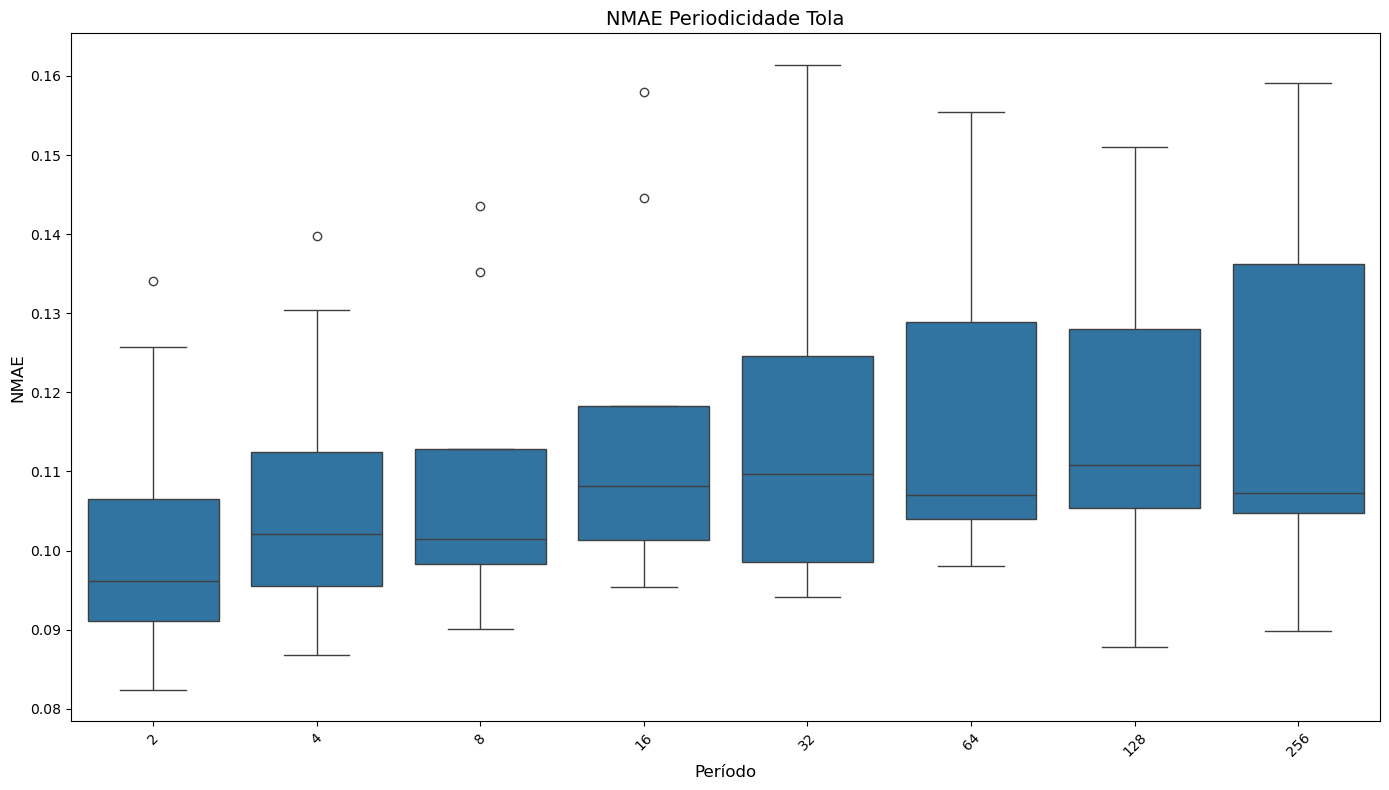

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data)

plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
plt.title("NMAE Periodicidade Tola", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

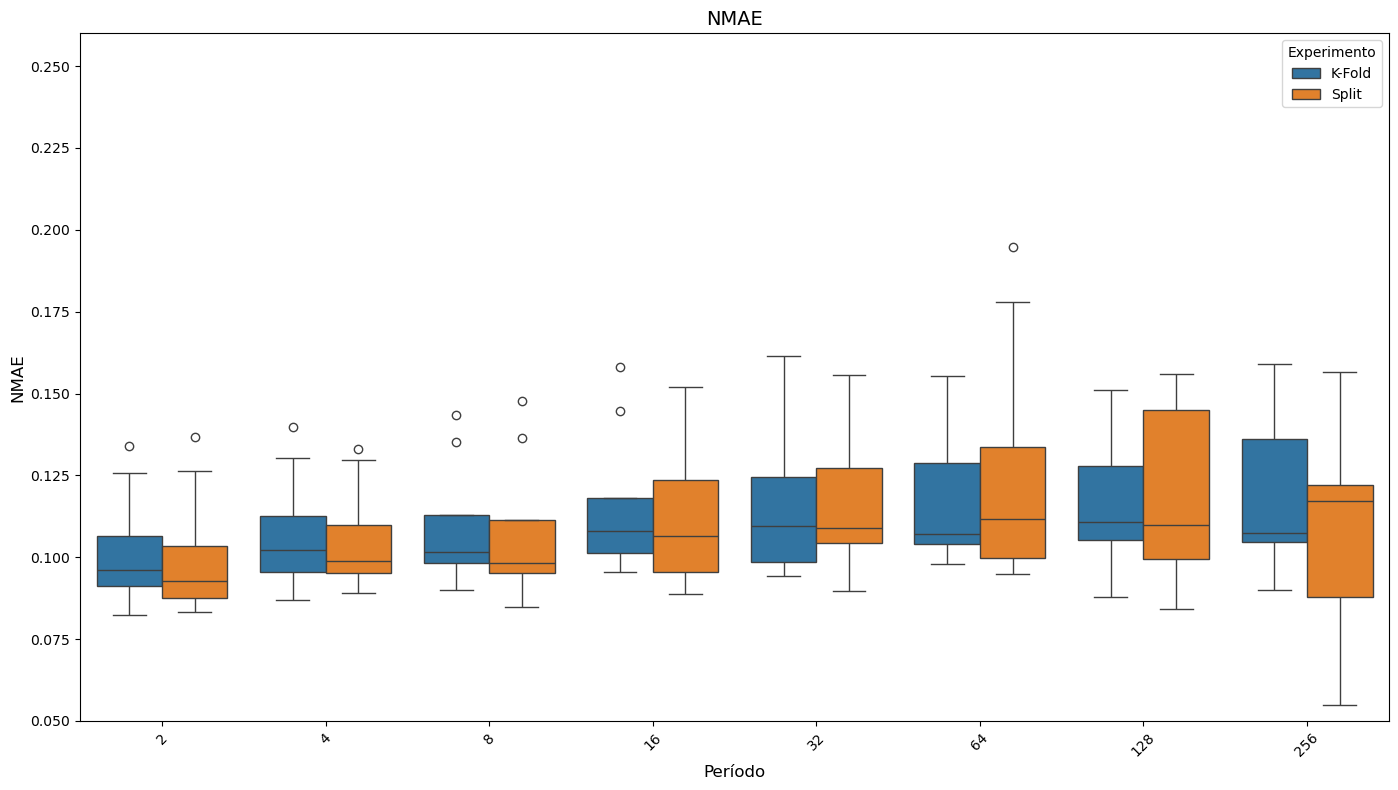

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_limits = (0.05, 0.26)

plt.figure(figsize=(14, 8))

data['Experimento'] = 'K-Fold'
reference_split['Experimento'] = 'Split'
#reference_tptt['Experimento'] = 'TPTT'

data_combined = pd.concat([data, reference_split], ignore_index=True)

sns.boxplot(x='período', y='nmae', data=data_combined, hue='Experimento')



plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
plt.title("NMAE", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(y_limits)
plt.show()

In [34]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [36]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [37]:
group_by_method

,período,método,mean,std
0,8,RF,11.0,2.0
1,8,RT,13.0,4.0
2,16,RF,11.0,2.0
3,16,RT,12.0,2.0
4,32,RF,12.0,3.0
5,32,RT,13.0,4.0
6,64,RF,12.0,2.0
7,64,RT,13.0,2.0
8,128,RF,12.0,3.0
9,128,RT,11.0,3.0


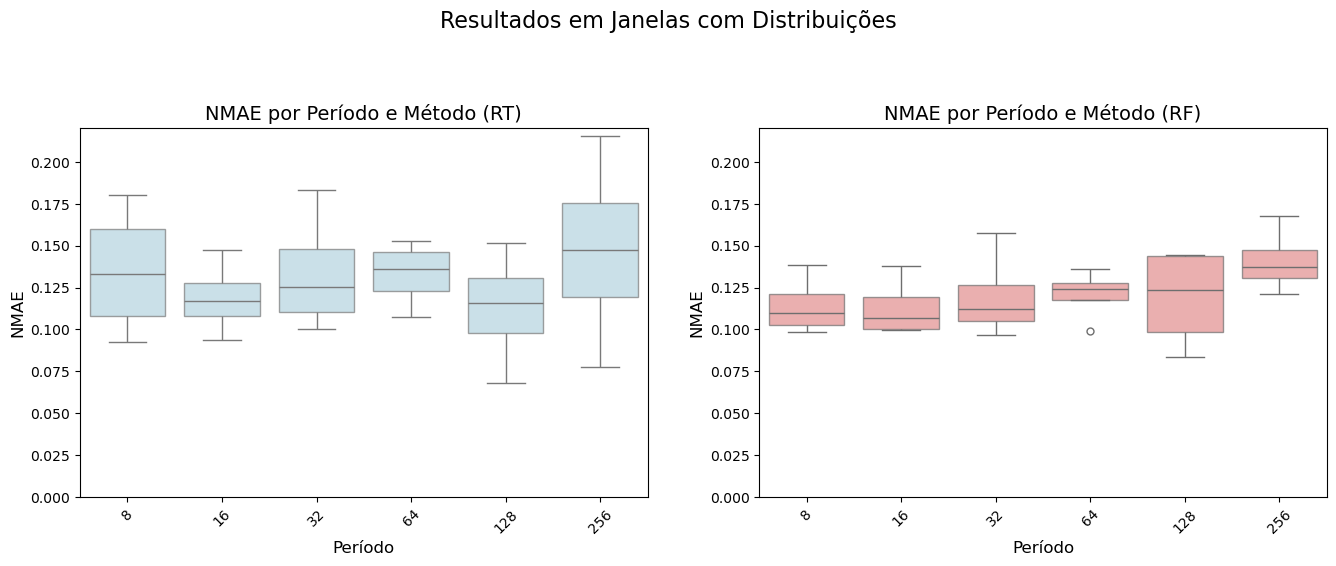

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.22)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()


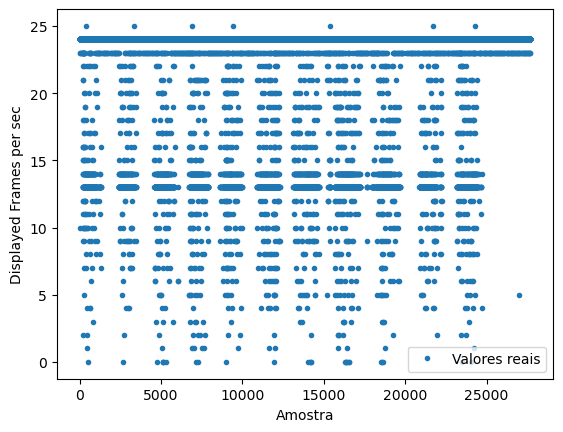

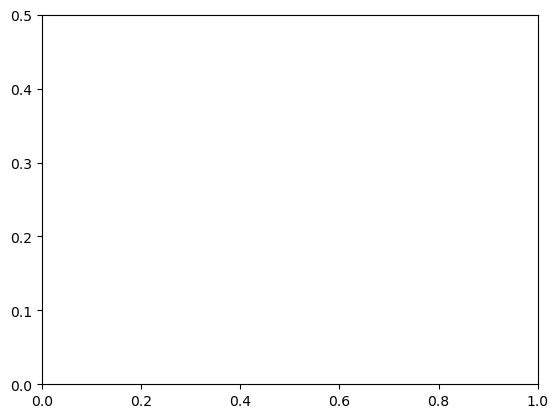

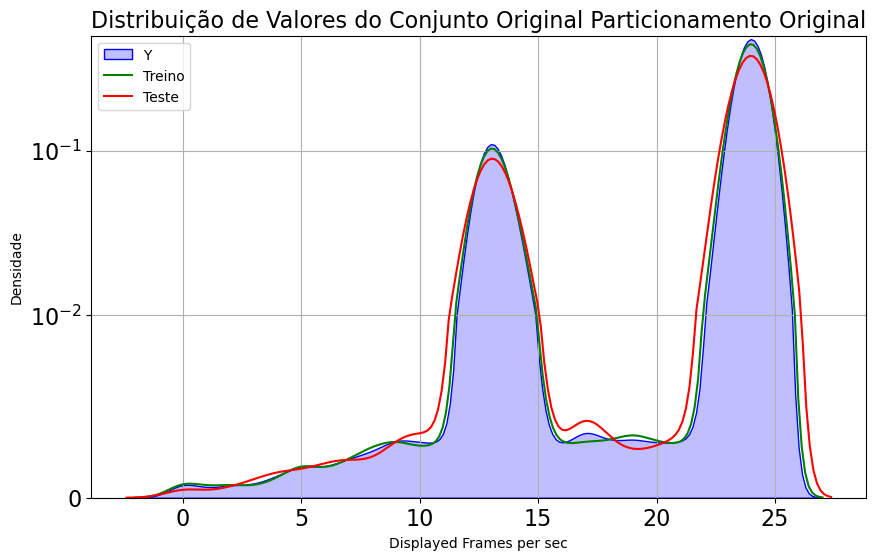

In [24]:
# Importar bibliotecas necessárias  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold  
from sklearn.metrics import mean_squared_error  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd

from dataset_management import parse_traces


def normalized_mean_absolute_error(y_true, y_pred):  
# Cálculo do NMAE  
  nmae = (abs(y_pred - y_true.values.ravel()).mean())/y_true.values.ravel().mean()  
  return nmae

# Abrir datasets X e y  

X_raw, y_raw = parse_traces(
    'VoD-BothApps-PeriodicLoad', 'DispFrames', ['X_cluster.csv', 'X_flow.csv', 'X_port.csv'])

#Merge por timestamp e separação em X e y  
#merge_raw = pd.concat([X_raw, y_raw], axis=1)  
X_features = ['all_..idle','X..memused','proc.s','cswch.s','file.nr','sum_intr.s','ldavg.1','tcpsck','pgfree.s']  
#y_target = ['DispFrames']  
X = X_raw#[X_features]  
y = y_raw#[y_target]

# Dividir dados em treinamento e teste  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

#Dividir dados em treinamento e teste usando K-Fold  
# Definir número de folds  
#k = 3

# Criar objeto KFold com shuffle=False  
#kf = KFold(n_splits=k, shuffle=True)

# Realizar treinamento e teste com K-Fold  
#for fold, (train_index, test_index) in enumerate(kf.split(X)):  
  # X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
  # y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Visualizar os resultados  
plt.plot(y.values.ravel(), marker=".", linestyle="None", label="Valores reais")  
plt.xlabel("Amostra")  
plt.ylabel("Displayed Frames per sec")  
plt.legend()  
plt.show()

plt.ylim((0, 0.5))
plt.figure(figsize=(10, 6))  
plt.yscale('symlog', linthresh=0.01)  # Avoids log(0) issues
sns.kdeplot(y['DispFrames'], color='blue', fill=True, label='Y')  
sns.kdeplot(y_train['DispFrames'], color='green', fill=False, label='Treino')  
sns.kdeplot(y_test['DispFrames'], color='red', fill=False, label='Teste')  
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Displayed Frames per sec')  
plt.ylabel('Densidade')  
plt.title('Distribuição de Valores do Conjunto Original Particionamento Original', fontsize=16)  
plt.ylim((0, 0.5))
plt.legend()  
plt.grid(True)  
plt.show()

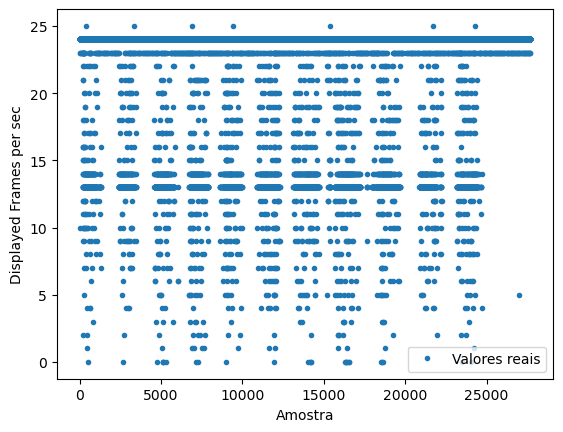

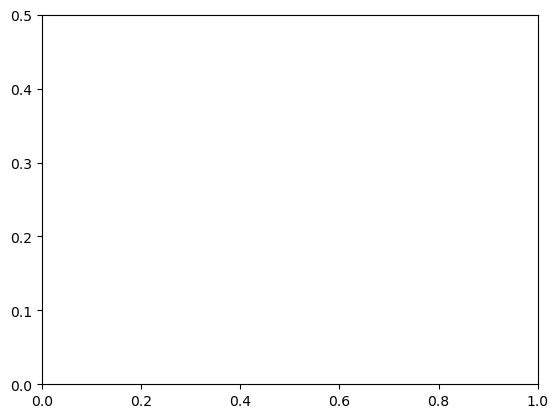

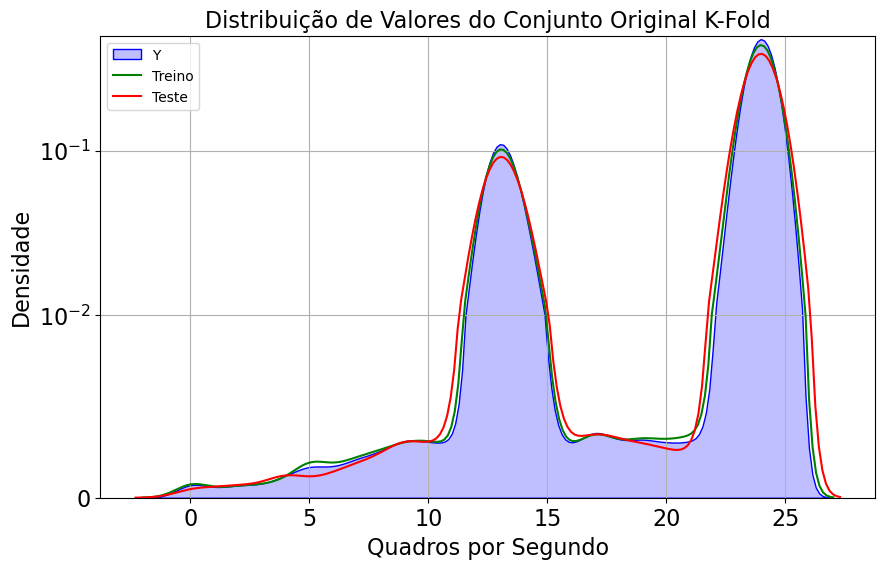

In [21]:
# Importar bibliotecas necessárias  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold  
from sklearn.metrics import mean_squared_error  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd

from dataset_management import parse_traces


def normalized_mean_absolute_error(y_true, y_pred):  
# Cálculo do NMAE  
  nmae = (abs(y_pred - y_true.values.ravel()).mean())/y_true.values.ravel().mean()  
  return nmae

# Abrir datasets X e y  

X_raw, y_raw = parse_traces(
    'VoD-BothApps-PeriodicLoad', 'DispFrames', ['X_cluster.csv', 'X_flow.csv', 'X_port.csv'])

#Merge por timestamp e separação em X e y  
#merge_raw = pd.concat([X_raw, y_raw], axis=1)  
X_features = ['all_..idle','X..memused','proc.s','cswch.s','file.nr','sum_intr.s','ldavg.1','tcpsck','pgfree.s']  
#y_target = ['DispFrames']  
X = X_raw#[X_features]  
y = y_raw#[y_target]

# Dividir dados em treinamento e teste  
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

#Dividir dados em treinamento e teste usando K-Fold  
# Definir número de folds  
k = 3

# Criar objeto KFold com shuffle=False  
kf = KFold(n_splits=k, shuffle=True)

# Realizar treinamento e teste com K-Fold  
for fold, (train_index, test_index) in enumerate(kf.split(X)):  
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Visualizar os resultados  
plt.plot(y.values.ravel(), marker=".", linestyle="None", label="Valores reais")  
plt.xlabel("Amostra")  
plt.ylabel("Displayed Frames per sec")  
plt.legend()  
plt.show()

plt.ylim((0, 0.5))
plt.figure(figsize=(10, 6))  
plt.yscale('symlog', linthresh=0.01)  # Avoids log(0) issues
sns.kdeplot(y['DispFrames'], color='blue', fill=True, label='Y')  
sns.kdeplot(y_train['DispFrames'], color='green', fill=False, label='Treino')  
sns.kdeplot(y_test['DispFrames'], color='red', fill=False, label='Teste')  
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Quadros por Segundo', fontsize=16)  
plt.ylabel('Densidade', fontsize=16)  
plt.legend(prop={'size': 16})  
plt.title('Distribuição de Valores do Conjunto Original K-Fold', fontsize=16)  
plt.ylim((0, 0.5))
plt.legend()  
plt.grid(True)  
plt.show()

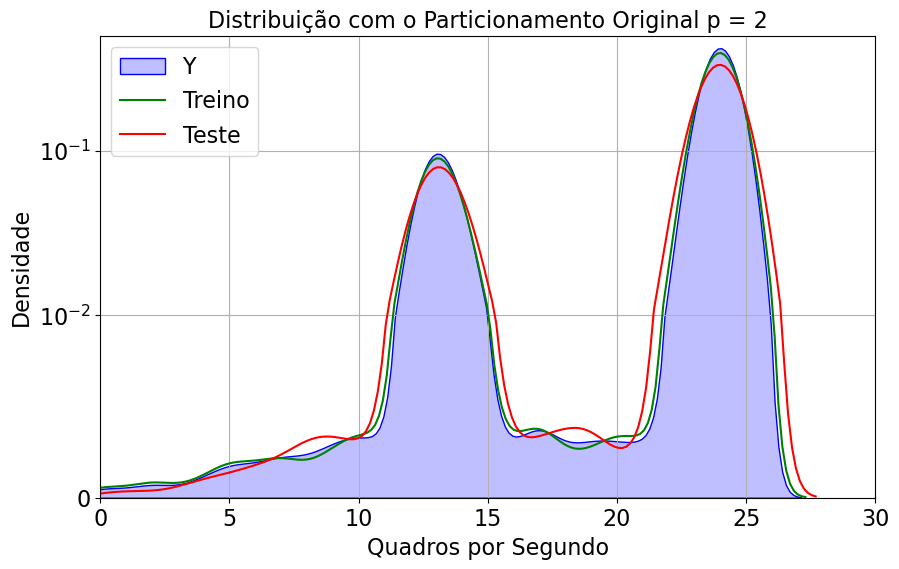

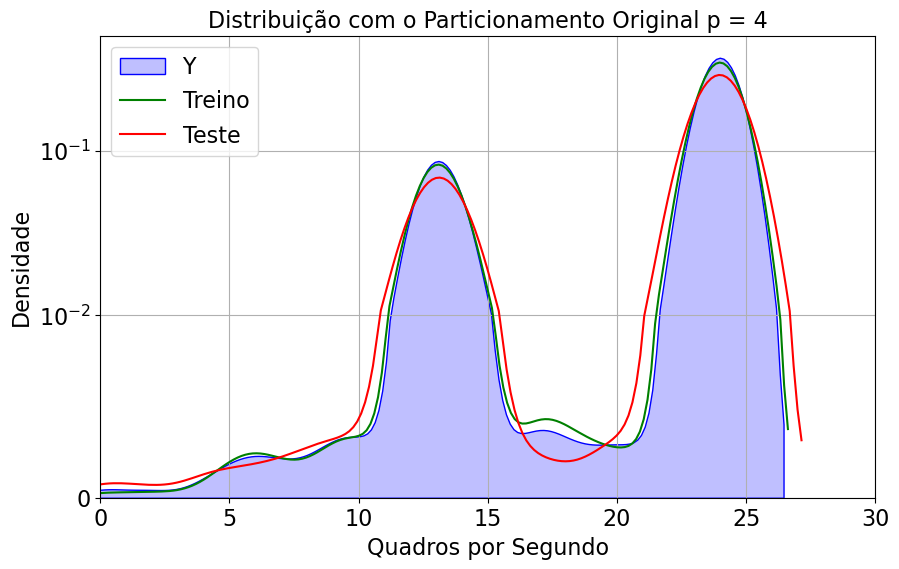

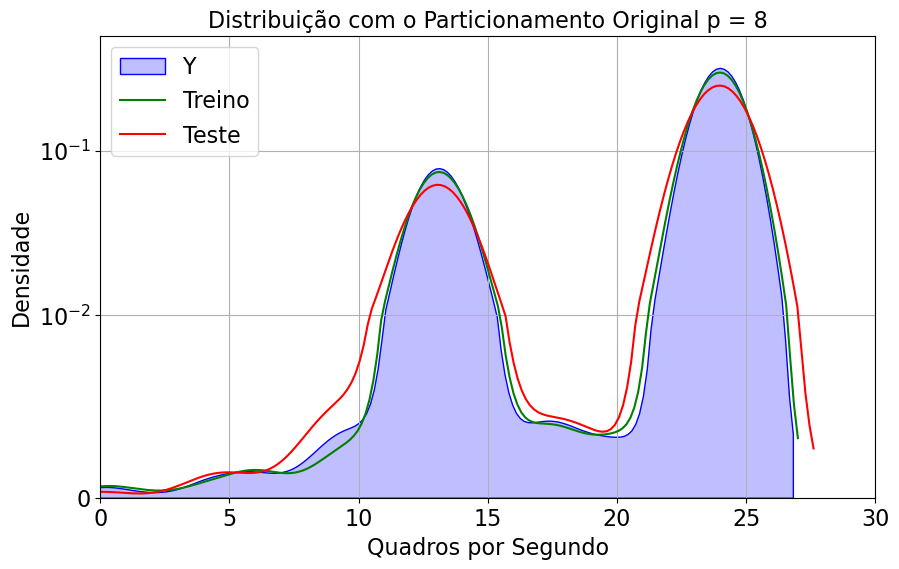

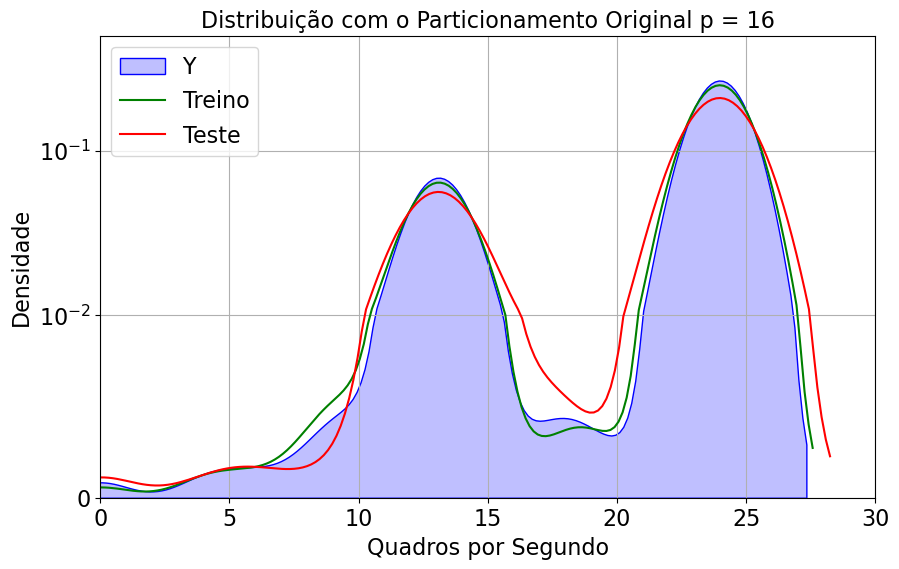

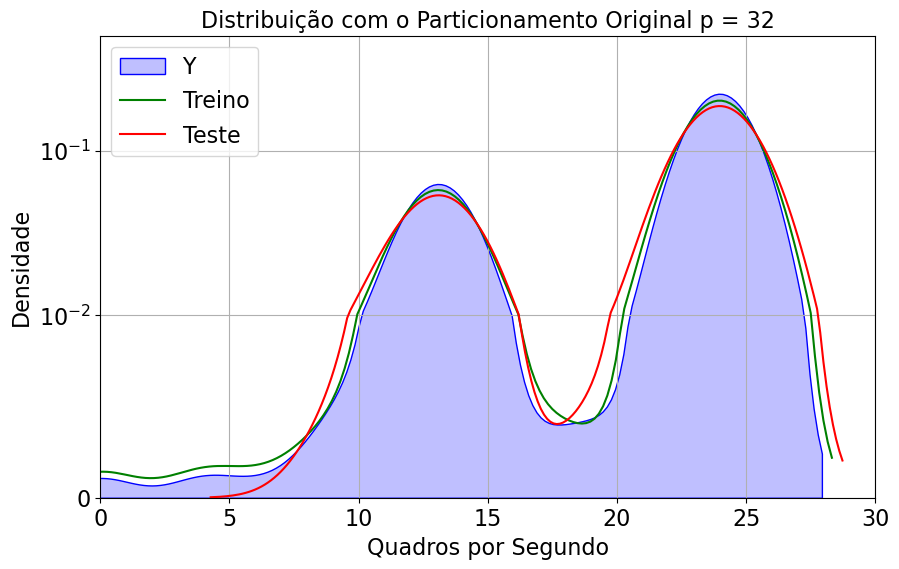

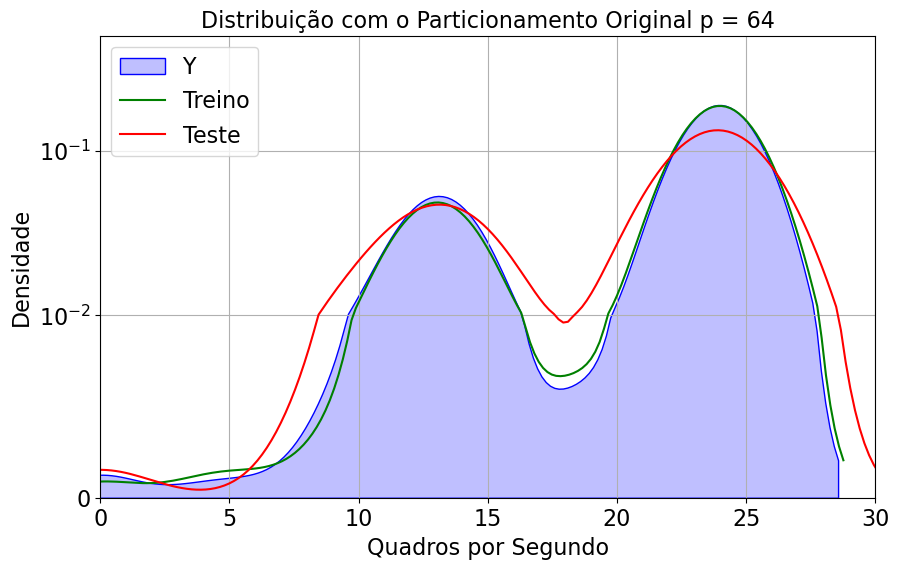

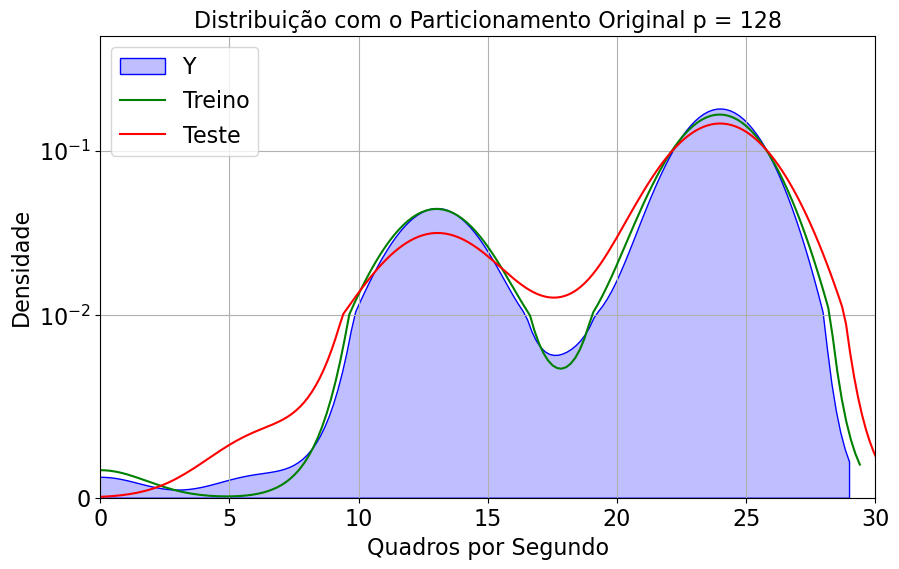

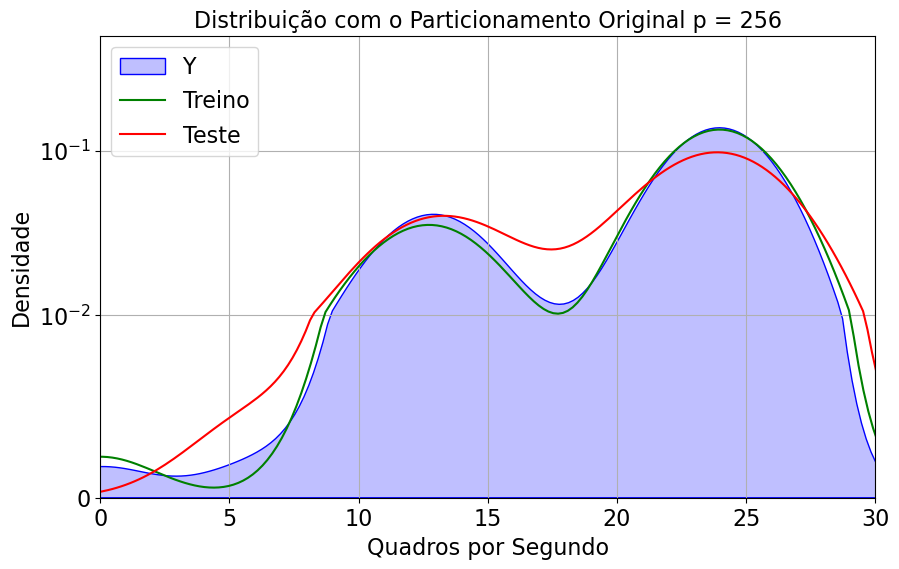

In [18]:
# Importar bibliotecas necessárias  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold  
from sklearn.metrics import mean_squared_error  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd

from dataset_management import parse_traces


def normalized_mean_absolute_error(y_true, y_pred):  
# Cálculo do NMAE  
  nmae = (abs(y_pred - y_true.values.ravel()).mean())/y_true.values.ravel().mean()  
  return nmae

def filter_periodic(x, y, period: int):
    mask = (x.index % period == 0)
    x_filtered = x.loc[mask]
    y_filtered = y.loc[mask]

    return x_filtered, y_filtered
# Abrir datasets X e y  

X_raw, y_raw = parse_traces(
    'VoD-BothApps-PeriodicLoad', 'DispFrames', ['X_cluster.csv', 'X_flow.csv', 'X_port.csv'])

PERIODS = [2,4,8,16,32,64,128,256]

for period in PERIODS:
  #y_target = ['DispFrames']  
  X, y = filter_periodic(X_raw, y_raw, period)

  # Dividir dados em treinamento e teste  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

  #Dividir dados em treinamento e teste usando K-Fold  
  # Definir número de folds  
  #k = 3

  # Criar objeto KFold com shuffle=False  
  #kf = KFold(n_splits=k, shuffle=True)

  # Realizar treinamento e teste com K-Fold  
  #for fold, (train_index, test_index) in enumerate(kf.split(X)):  
    # X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
    # y_train, y_test = y.iloc[train_index], y.iloc[test_index]



  plt.figure(figsize=(10, 6))
  plt.ylim((0, 0.5))
  plt.yscale('symlog', linthresh=0.01)  # Avoids log(0) issues
  plt.xlim((0, 30))

  sns.kdeplot(y['DispFrames'], color='blue', fill=True, label='Y')  
  sns.kdeplot(y_train['DispFrames'], color='green', fill=False, label='Treino')  
  sns.kdeplot(y_test['DispFrames'], color='red', fill=False, label='Teste')  
  plt.xlabel('Quadros por Segundo', fontsize=16)  
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.ylabel('Densidade', fontsize=16)  
  plt.title('Distribuição com o Particionamento Original p = ' + str(period), fontsize=16)  
  plt.legend(prop={'size': 16})  
  plt.grid(True)  
  plt.show()


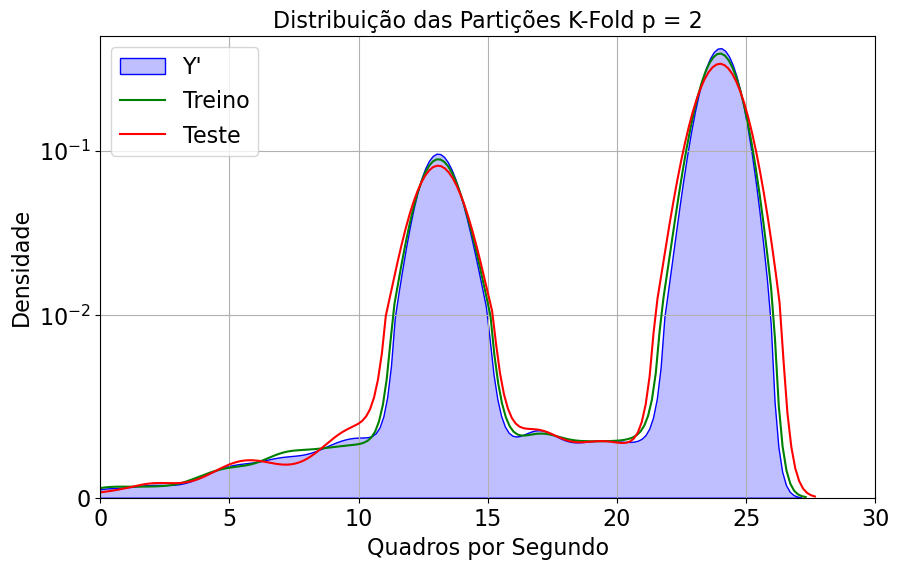

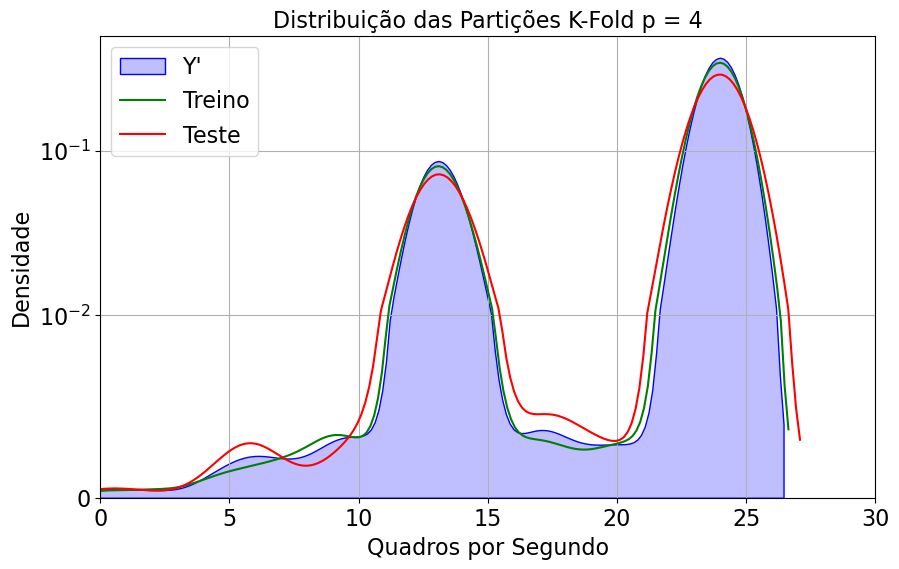

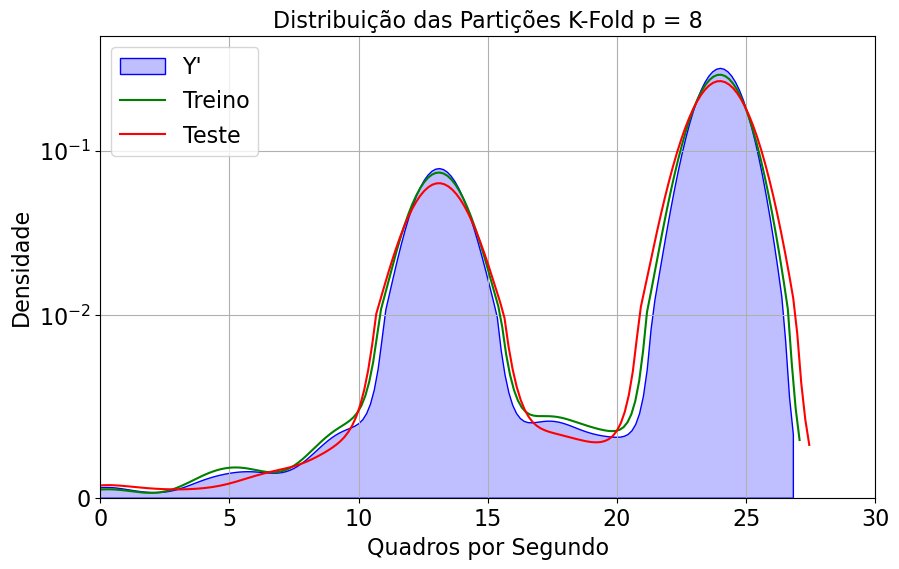

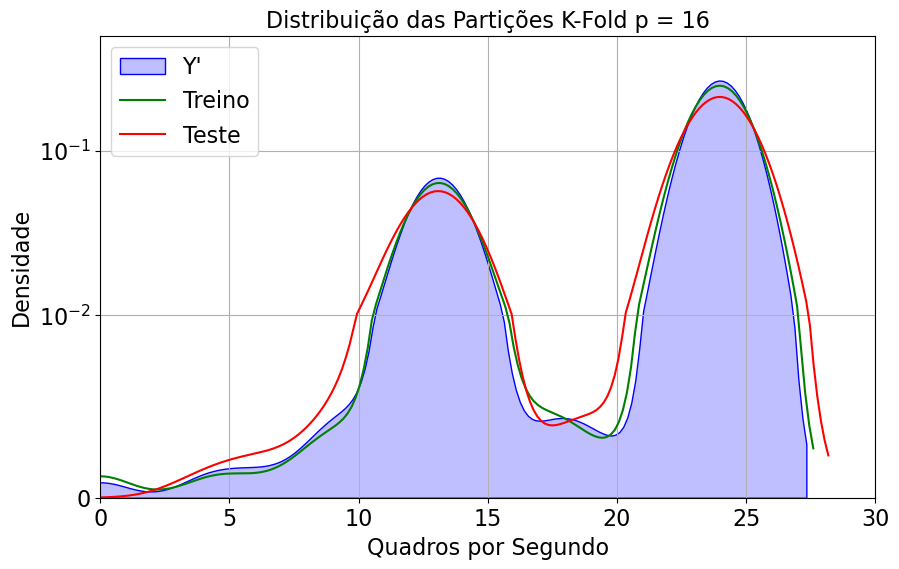

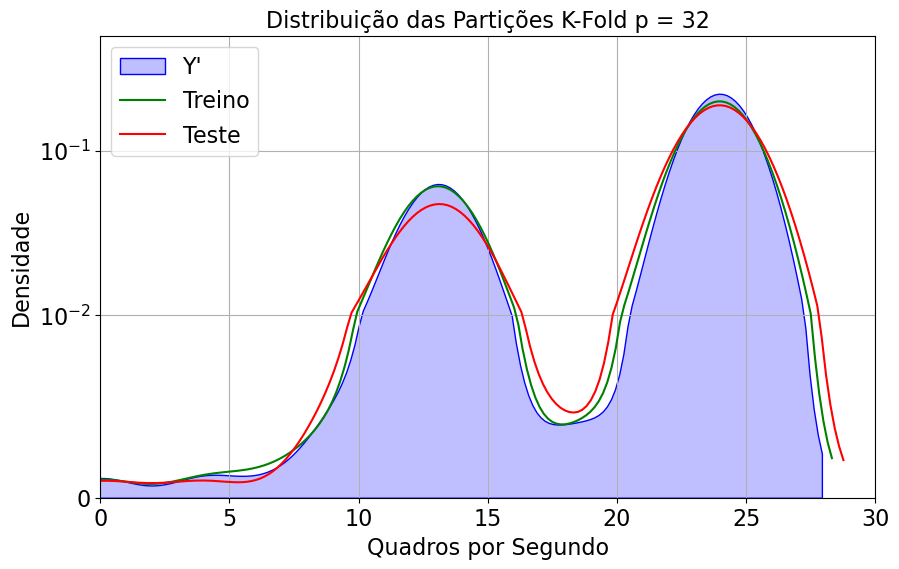

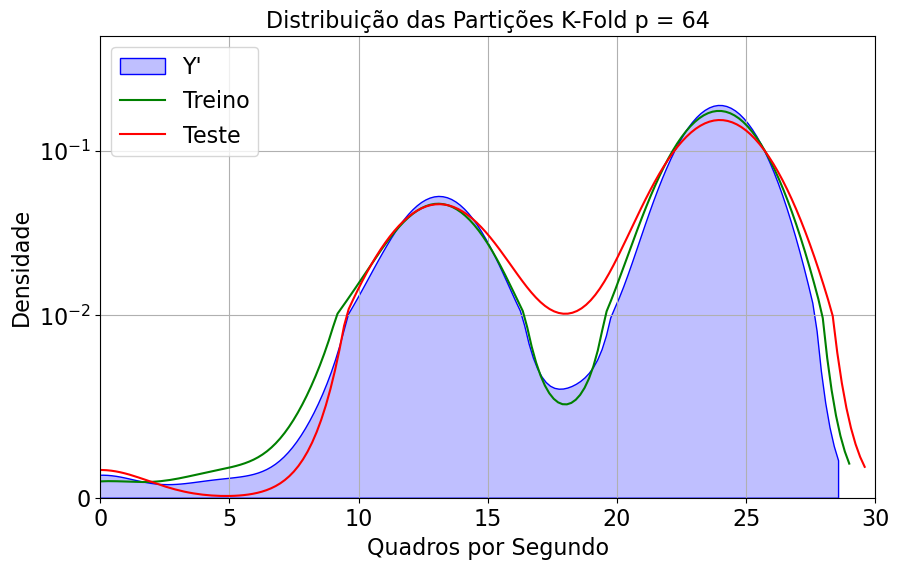

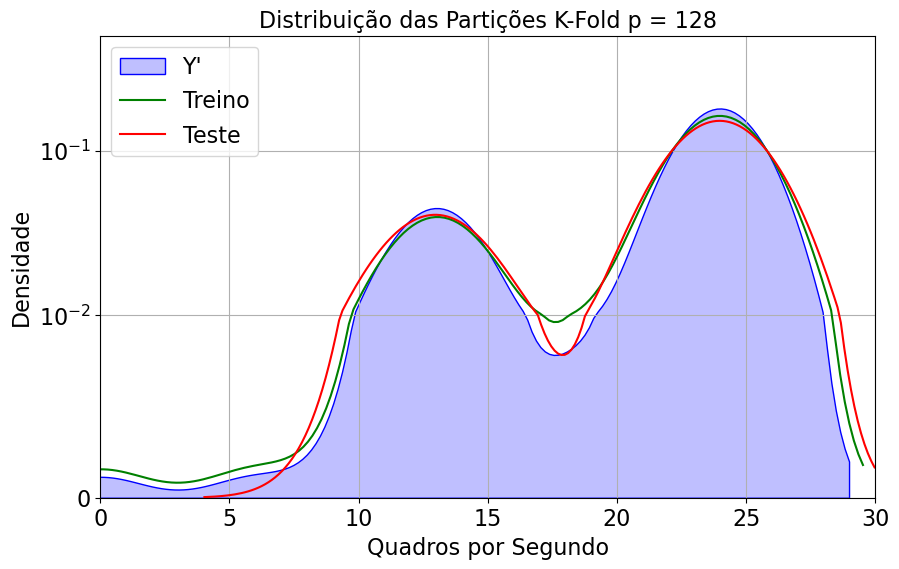

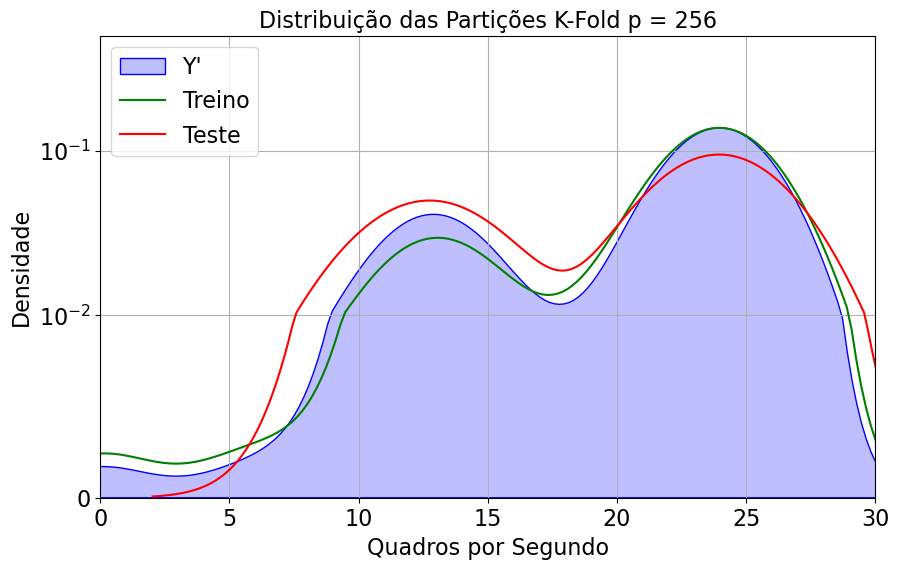

In [4]:
# Importar bibliotecas necessárias  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold  
from sklearn.metrics import mean_squared_error  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd

from dataset_management import parse_traces


def normalized_mean_absolute_error(y_true, y_pred):  
# Cálculo do NMAE  
  nmae = (abs(y_pred - y_true.values.ravel()).mean())/y_true.values.ravel().mean()  
  return nmae

def filter_periodic(x, y, period: int):
    mask = (x.index % period == 0)
    x_filtered = x.loc[mask]
    y_filtered = y.loc[mask]

    return x_filtered, y_filtered
# Abrir datasets X e y  

X_raw, y_raw = parse_traces(
    'VoD-BothApps-PeriodicLoad', 'DispFrames', ['X_cluster.csv', 'X_flow.csv', 'X_port.csv'])

PERIODS = [2,4,8,16,32,64,128,256]

for period in PERIODS:
  #y_target = ['DispFrames']  
  X, y = filter_periodic(X_raw, y_raw, period)

  #Dividir dados em treinamento e teste usando K-Fold  
  # Definir número de folds  
  k = 3

  # Criar objeto KFold com shuffle=False  
  kf = KFold(n_splits=k, shuffle=True, random_state=42)

  # Realizar treinamento e teste com K-Fold  
  for fold, (train_index, test_index) in enumerate(kf.split(X)):  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  plt.figure(figsize=(10, 6))  
  sns.kdeplot(y['DispFrames'], color='blue', fill=True, label='Y\'')  
  sns.kdeplot(y_train['DispFrames'], color='green', fill=False, label='Treino')  
  sns.kdeplot(y_test['DispFrames'], color='red', fill=False, label='Teste')  
  plt.xlabel('Quadros por Segundo',  fontsize=16)  
  plt.ylabel('Densidade', fontsize=16)  
  plt.title('Distribuição das Partições K-Fold p = ' + str(period), fontsize=16)  
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.ylim((0, 0.5))
  plt.yscale('symlog', linthresh=0.01)  # Avoids log(0) issues


  plt.xlim((0, 30))
  plt.legend(prop={'size': 16})  
  plt.grid(True)  
  plt.show()
